# **Trabajo Final - Laboratorio II**

*Integrantes:* 
* Dellatore, Andrés
* Forconi, Gerónimo 
* Lignini, Maira
* Palomeque, Claudia
* Postiglione, Sebastián
* ...., Elemir

## 1. Objetivo

Se busca predecir la velocidad a la que se adopta una mascota.
En este caso, la velocidad de adopción se determina por la rapidez con la que todas las mascotas del grupo son adoptadas.

Los datos que se disponen incluyen información de texto, tabulares y datos de imágenes.

## 2. Información disponible

### Variables dataset inicial
* PetID - Identificador único en forma de hash del perfil de la mascota
* Tipo - Tipo de animal (1 = Perro, 2 = Gato)
* Nombre - Nombre de la mascota (Vacío si no tiene nombre)
* Edad - Edad de la mascota cuando se registró, en meses
* Raza1 - Raza principal de la mascota 
* Raza2 - Raza secundaria de la mascota, si es de raza mixta 
* Género - Género de la mascota (1 = Macho, 2 = Hembra, 3 = Mixto, si el perfil representa a un grupo de mascotas)
* Color1 - Color 1 de la mascota 
* Color2 - Color 2 de la mascota 
* Color3 - Color 3 de la mascota 
* TamañoMaduro - Tamaño en la madurez (1 = Pequeño, 2 = Mediano, 3 = Grande, 4 = Extra Grande, 0 = No Especificado)
* LongitudPelaje - Longitud del pelaje (1 = Corto, 2 = Mediano, 3 = Largo, 0 = No Especificado)
* Vacunado - Si la mascota ha sido vacunada (1 = Sí, 2 = No, 3 = No Estoy Seguro)
* Desparasitado - Si la mascota ha sido desparasitada (1 = Sí, 2 = No, 3 = No Estoy Seguro)
* Esterilizado - Si la mascota ha sido esterilizada / castrada (1 = Sí, 2 = No, 3 = No Estoy Seguro)
* Salud - Condición de salud (1 = Saludable, 2 = Lesión Menor, 3 = Lesión Grave, 0 = No Especificado)
* Cantidad - Número de mascotas representadas en el perfil
* Tarifa - Tarifa de adopción (0 = Gratis)
* Estado - Ubicación en el estado de Malasia 
* IDRescatador - Identificador único en forma de hash del rescatador
* CantidadVideos - Total de videos subidos para esta mascota
* CantidadFotos - Total de fotos subidas para esta mascota
* Descripción - Descripción escrita del perfil de esta mascota. El idioma principal utilizado es el inglés, con algunas descripciones en malayo o chino.

### Variable Target
*AdoptionSpeed* - Velocidad de adopción (categorizada).

0 - La mascota fue adoptada el mismo día en que fue listada.

1 - La mascota fue adoptada entre 1 y 7 días (1ra semana) después de ser listada.

2 - La mascota fue adoptada entre 8 y 30 días (1er mes) después de ser listada.

3 - La mascota fue adoptada entre 31 y 90 días (2do y 3er mes) después de ser listada.

4 - No hubo adopción después de 100 días de ser listada. (En este conjunto de datos, no hay mascotas que hayan esperado entre 90 y 100 días). 

### Información adicional
* Metadatos de las imágenes
* Datos de Sentimiento


# 3. Análisis

## Etapa 1 : Utilizo sólo la información disponible en Train


In [2]:
# 1. Importo librerias

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#import cv2 #Para cargar/mostrar/procesar imagenes
import json
import glob #Para listar los archivos en una carpeta

# Librerias propias (contienen los modelos)
import model_metadata
import model_sentiment

# cargar el resto de las librerias necesarias acá




In [11]:
#Código Auxiliar!
#Para borrar la cache de las librerias propias
#import importlib
#importlib.reload(model_sentiment)
#importlib.reload(model_metadata)

<module 'model_metadata' from 'c:\\Users\\Maira\\Desktop\\MAESTRIA\\LABO_II\\Kaggle\\notebooks\\model_metadata.py'>

In [3]:
#2. Lectura Dataset inicial 
train_data = pd.read_csv('../data/train/train.csv', index_col='PetID') # este dataset es el train no el total. El tratamiento posterior debe replicarse en test

print (train_data.head(10))
# Info del dataset

train_data.info ()
#14.993 registros
#23 variables

# Se presentan variables como númericas cuando en realidad el número en cuestión es una categoría.
# Hay que transformarla 



           Type                     Name  Age  Breed1  Breed2  Gender  Color1  \
PetID                                                                           
86e1089a3     2                   Nibble    3     299       0       1       1   
6296e909a     2              No Name Yet    1     265       0       1       1   
3422e4906     1                   Brisco    1     307       0       1       2   
5842f1ff5     1                     Miko    4     307       0       2       1   
850a43f90     1                   Hunter    1     307       0       1       1   
d24c30b4b     2                      NaN    3     266       0       2       5   
1caa6fcdb     2                    BULAT   12     264     264       1       1   
97aa9eeac     1  Siu Pak & Her 6 Puppies    0     307       0       2       1   
c06d167ca     2                      NaN    2     265       0       2       6   
7a0942d61     2                    Kitty   12     265       0       2       1   

           Color2  Color3  

In [4]:
#3. Transformación de los datos

train_data['Type'] = train_data['Type'].astype('category')
train_data['Breed1'] = train_data['Breed1'].astype('category')
train_data['Breed2'] = train_data['Breed2'].astype('category')
train_data['Gender'] = train_data['Gender'].astype('category')
train_data['Color1'] = train_data['Color1'].astype('category')
train_data['Color2'] = train_data['Color2'].astype('category')
train_data['Color3'] = train_data['Color3'].astype('category')
train_data['MaturitySize'] = train_data['MaturitySize'].astype('category')
train_data['FurLength'] = train_data['FurLength'].astype('category')
train_data['Vaccinated'] = train_data['Vaccinated'].astype('category')
train_data['Dewormed'] = train_data['Dewormed'].astype('category')
train_data['Sterilized'] = train_data['Sterilized'].astype('category')
train_data['Health'] = train_data['Health'].astype('category')
train_data['State'] = train_data['State'].astype('category')
train_data['AdoptionSpeed'] = train_data['AdoptionSpeed'].astype('category')
#train_data.info()--> ok



In [5]:
#4. 
# a. Estadísticas descriptivas (continuas) y tablas de frecuencias (categóricas)

# Separar las columnas continuas y categóricas
columnas_continuas = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_categoricas = train_data.select_dtypes(include=['category']).columns.tolist()

# Estadísticas descriptivas para variables continuas
descripcion_continuas = train_data[columnas_continuas].describe()

# Frecuencias por categorías para variables categóricas
frecuencias_categoricas = {}
for columna in columnas_categoricas:
    frecuencias_categoricas[columna] = train_data[columna].value_counts()

# Imprimir las estadísticas descriptivas para variables continuas
print("Estadísticas descriptivas para variables continuas:")
print(descripcion_continuas)
print()

# Imprimir las frecuencias por categorías para variables categóricas
for columna, frecuencias in frecuencias_categoricas.items():
    print(f"Frecuencias para {columna}:")
    print(frecuencias)
    print()


Estadísticas descriptivas para variables continuas:
                Age      Quantity           Fee      VideoAmt      PhotoAmt
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000
mean      10.452078      1.576069     21.259988      0.056760      3.889215
std       18.155790      1.472477     78.414548      0.346185      3.487810
min        0.000000      1.000000      0.000000      0.000000      0.000000
25%        2.000000      1.000000      0.000000      0.000000      2.000000
50%        3.000000      1.000000      0.000000      0.000000      3.000000
75%       12.000000      1.000000      0.000000      0.000000      5.000000
max      255.000000     20.000000   3000.000000      8.000000     30.000000

Frecuencias para Type:
Type
1    8132
2    6861
Name: count, dtype: int64

Frecuencias para Breed1:
Breed1
307    5927
266    3634
265    1258
299     342
264     296
       ... 
99        1
93        1
85        1
81        1
192       1
Name: count, Length: 176

In [6]:

# b. Divido el dataset para poder trabajar con la librería profiling
vbles_continuas = train_data.select_dtypes(include=['float64', 'int64'])
vbles_categoricas = train_data.select_dtypes(include=['category']) 

# Armo sub-dataset de vbles categóricas para analizar
vble_target = vbles_categoricas.filter(['AdoptionSpeed'], axis=1)
vbles_cat_gral = vbles_categoricas.filter(['Type', 'State'], axis=1)
vbles_cat_salud = vbles_categoricas.filter(['Vaccinated', 'Health', 'Sterilized', 'Dewormed' ], axis=1)
vbles_cat_fisicas1 = vbles_categoricas.filter(['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3'], axis=1)
vbles_cat_fisicas2 = vbles_categoricas.filter(['Gender', 'MaturitySize', 'FurLength'], axis=1)


#print(vbles_continuas)
#print(vbles_cat_gral)
#print(vbles_cat_salud)
#print(vbles_cat_fisicas1)
#print(vbles_cat_fisicas2)

In [38]:
# 3. EDA

from ydata_profiling import ProfileReport

EDA_cont = ProfileReport(vbles_continuas)
EDA_cont.to_file("EDA_continuas.html")

EDA_target = ProfileReport(vble_target)
EDA_target.to_file("EDA_target.html")

EDA_cat_gral = ProfileReport(vbles_cat_gral)
EDA_cat_gral.to_file("EDA_cat_gral.html")

EDA_cat_salud = ProfileReport(vbles_cat_salud)
EDA_cat_salud.to_file("EDA_cat_salud.html")

EDA_cat_fisicas1 = ProfileReport(vbles_cat_fisicas1)
EDA_cat_fisicas1.to_file("EDA_cat_fisicas1.html")

EDA_cat_fisicas2 = ProfileReport(vbles_cat_fisicas2)
EDA_cat_fisicas2.to_file("EDA_cat_fisicas2.html")

#del EDA_cont
#del EDA_cat_gral
#del EDA_cat_salud 
#del EDA_cat_fisicas1
#del EDA_cat_fisicas2

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Análisis exploratorio de los datos

#### Análisis univariado

El dataset no presenta valores faltantes.
En relación al valor “cero”, son valores posibles para las variables indicando la ausencia del atributo que se está midiendo.

*Variables continuas*

Edad
Se presenta una amplia variabilidad en las edades registradas. El rango de edades va desde un mínimo de 0 meses hasta un máximo de 255 meses, lo que indica que se incluyen mascotas de todas las edades. 
La mediana de la edad es de 3 meses, lo que sugiere que la mitad de las mascotas en el conjunto de datos son menores de 3 meses, mientras que la otra mitad son mayores de 3 meses. 
El rango intercuartil (RIQ) de 10 meses indíca que el 50% intermedio de las edades se encuentra en un rango de 2 meses a 12 meses. La desviación estándar de 18.16 indica una dispersión significativa en las edades. 
Se presentan edades extremas en este dataset.

Cantidad (número de perfiles de las mascotas) 
Se evidencia que la mayoría de los valores se concentran en torno a un número bajo, ya que tanto la mediana como los cuartiles (Q1 y Q3) tienen un valor de 1. Además, el rango intercuartil (RIQ) es igual a 0, lo que indica que el 50% intermedio de los datos está en el mismo valor (1).
Sin embargo, la variable muestra tambien una amplia dispersión en los datos. Esto sugiere que, aunque la mayoría de los perfiles de mascotas tienen una cantidad baja, existen algunos valores atípicos o extremos que contribuyen a esta dispersión. El coeficiente de variación (CV) es menor que 1, lo que indica una variabilidad relativamente baja en relación con la media.

Tarifa de adopción
Es evidente que una gran proporción de las adopciones se ofrecen de forma gratuita, ya que el valor mínimo, los percentiles 5, 25, 50 y 75, todos tienen un valor de 0. Esto indica que muchas mascotas se ofrecen sin costo alguno para los adoptantes.
Sin embargo, también se observa una amplia variación en los datos, ya que el rango es de 3000, lo que significa que la tarifa máxima de adopción es 3000 veces mayor que la tarifa mínima. Esto se refleja en la alta desviación estándar y el coeficiente de variación (CV) mayor a 1, lo que indica una dispersión significativa en los datos en relación con la media.
Por lo tanto, aunque la mayoría de las adopciones son gratuitas, existen casos excepcionales donde se cobra una tarifa sustancial por la adopción.

Cantidad de videos
La variable muestra que la gran mayoría de los perfiles de mascotas no incluyen videos, pero también señala una pequeña cantidad de casos excepcionales con un pequeño número de videos. La distribución de datos es altamente sesgada hacia la falta de videos.

Cantidad de fotos
La variable tiene un rango que va desde un mínimo de 0 (indicando que no hay fotos) hasta un máximo de 30 (indicando un valor extremo de fotos). Esto refleja la variedad en la cantidad de fotos que se incluyen en los perfiles de mascotas.
Los percentiles y cuartiles muestran que la mayoría de los perfiles de mascotas tienen al menos algunas fotos, ya que el percentil 5, el primer cuartil (Q1) y la mediana son mayores que 0. El tercer cuartil (Q3) indica que el 75% de los perfiles tienen 5 fotos o menos, y el percentil 95 indica que la gran mayoría de los perfiles tienen 10 fotos o menos.
La distribución de datos tiende a concentrarse en valores bajos, pero permite un número variable de fotos en algunos perfiles.

*Variables categóricas*

En líneas generales podemos decir que:
El Train_data contiene un 54.2% de perros y un 45.8% de gatos. El mayor porcentaje de dichas mascotas corresponden a el estado de Selampor (58.1%) y Kualu Lumpur (25.6%).
En relación a caracteristicas físicas, observamos que en relación a la raza principal predomina la "raza mixta" (perro) (39,5%) y "Siberian Husky" (perro) (24.2%)". En menor medida, se encuentra la "doméstica de pelo medio" (gato) (8.4%). El resto de las razas tienen frecuencias menores al 2.5%.
El color principal de relevancia de las mascotas es el negro (49.5%) y en segundo lugar marrón (25%). El resto de los colores tienen frecuencias menores al 6.5%.
La mayoría de las mascotas son hembras (48.5%). El tamaño predominante es el mediano (68.7%) y la longitud del pelaje es sobresaliente para los pelo corto (58.7%).
En cuestiones de salud, un 48,2% no poseen sus vacunas y un 39.3% si poseen. Del resto de las mascotas, este dato se desconoce. Así mismo, casi la totalidad de las mascotas (96.6%) son saludables. El 67.2% no ha sido castrada y el 56.2% está deparasitada.

Rápidez de adopción
Algunas mascotas (2,7%) son adoptadas inmediatamente. Sin embargo, esto es raro (suerte).
Muchas mascotas no son adoptadas en absoluto (28%) y un 26,9% en el primer mes que se encuentran en el listado.
Las frecuencias en la rápidez de adopción no muestran diferencias significativas entre el resto de los períodos, con lo cuál sería necesario un análisis bivariado de la variable en cuestión para obtener otro tipo de conclusiones.




### Análisis Bivariado

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.ion() 

# Supongamos que tienes un DataFrame llamado 'df' con las variables categóricas 'variable1' y 'variable2'

# Crear el gráfico de barras bivariado
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Type', hue='AdoptionSpeed')
plt.xlabel('Type')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras Bivariado')
plt.legend(title='AdoptionSpeed', loc='upper right')  # Agregar leyenda

# Mostrar el gráfico
plt.tight_layout()
plt.show()


C:\Users\Maira\AppData\Local\Temp\ipykernel_11996\4182655612.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


## Etapa 2: Utilizo la información disponible de Train, metadata de imágenes y sentimientos

## Primer analisis:

Cargo el dataset completo y para el ID **0a0e8c15b** cargo las imagenes que tiene, metadata de las imagenes y analisis de sentimiento de la descripcion.

In [3]:
#No ejecutar
# Cargar CSV train de carpeta data/train/train.csv
bandera = False
if bandera:
    train_data = pd.read_csv('../data/train/train.csv', index_col='PetID')
    train_image_1 = cv2.imread('../data/train_images/0a0e8c15b-1.jpg')
    train_image_2 = cv2.imread('../data/train_images/0a0e8c15b-2.jpg')
    with open('../data/train_metadata/0a0e8c15b-1.json', 'r') as archivo:
        # Carga el contenido del archivo JSON en un diccionario
        train_metadata_1 = json.load(archivo)
    with open('../data/train_metadata/0a0e8c15b-2.json', 'r') as archivo:
        # Carga el contenido del archivo JSON en un diccionario
        train_metadata_2 = json.load(archivo)
    with open('../data/train_sentiment/0a0e8c15b.json', 'r') as archivo:
        # Carga el contenido del archivo JSON en un diccionario
        train_sentiment = json.load(archivo)

Creo una funcion para importar los archivos json a una lista. Los archivos los modelo y los inserto en una lista.

In [4]:
def getModel(model, listFileFullPath):
    '''model = clase del modelo que se quiere cargar (objeto)
    listFullPath = ruta completa de los archivos a cargar (List[string])
    '''
    #f_train_metadata = glob.glob('../data/train_metadata/*.json')
    #f_train_sentiments = glob.glob('../data/train_sentiment/*.json')

    listObject = []
    for file in listFileFullPath:
        
        file_json = None
        objectModel = None
        
        try:
            with open(file, 'r', encoding='utf-8') as archivo:  # Especifica la codificación utf-8 o la que corresponda
               file_json = json.load(archivo)
        except UnicodeDecodeError as e:
            print(f"Error de decodificación en el archivo '{file}': {e}")
            continue  # Continúa con el siguiente archivo en caso de error
        
        #print(file)
        
        #with open(file, 'r') as archivo:
           #file_json = json.load(archivo)    

        fileName = file.split('/')[-1]
        file_json['fileName'] = fileName
        file_json['PetID'] = fileName.split('.')[0].split('-')[0]
        objectModel = model.Model(**file_json)
        listObject.append(objectModel)

    return listObject 

In [5]:
train_data = pd.read_csv('../data/train/train.csv', index_col='PetID')

In [6]:
variable=glob.glob('../data/train_metadata/*.json')
nueva_variable = [ruta.replace('\\', '/') for ruta in variable]
nueva_variable
 #variable=['../data/train_metadata/0008c5398-1.json',
#  '../data/train_metadata/0008c5398-2.json',
#  '../data/train_metadata/0008c5398-3.json']
list_metadata = getModel(model_metadata, nueva_variable)

In [7]:
list_metadata


[Model(labelAnnotations=[LabelAnnotation(mid='/m/01yrx', description='cat', score=0.9943703, topicality=0.9943703), LabelAnnotation(mid='/m/07k6w8', description='small to medium sized cats', score=0.9213904, topicality=0.9213904), LabelAnnotation(mid='/m/01l7qd', description='whiskers', score=0.91749674, topicality=0.91749674), LabelAnnotation(mid='/m/0307l', description='cat like mammal', score=0.89707345, topicality=0.89707345), LabelAnnotation(mid='/m/014sv8', description='eye', score=0.80012083, topicality=0.80012083), LabelAnnotation(mid='/m/07kdjg0', description='khao manee', score=0.7978423, topicality=0.7978423), LabelAnnotation(mid='/m/012c9l', description='domestic short haired cat', score=0.79726064, topicality=0.79726064), LabelAnnotation(mid='/m/0hjzp', description='kitten', score=0.7815977, topicality=0.7815977), LabelAnnotation(mid='/m/04myxc', description='burmilla', score=0.77866554, topicality=0.77866554), LabelAnnotation(mid='/m/05mqq3', description='snout', score=0.

In [8]:
#train_data = pd.read_csv('../data/train/train.csv', index_col='PetID')


f_train_metadata = glob.glob('../data/train_metadata/*.json')
f_train_sentiments = glob.glob('../data/train_sentiment/*.json')

f_train_metadata2 = [ruta.replace('\\', '/') for ruta in f_train_metadata]
list_metadata = getModel(model_metadata, f_train_metadata2)
f_train_sentiments2= [ruta.replace('\\', '/') for ruta in f_train_sentiments]
list_sentiments = getModel(model_sentiment, f_train_sentiments2)

del f_train_metadata2
del f_train_sentiments2

## Unifico dataset e informacion extra

En esta seccion vamos a agregar informacion exta al dataset original. Vamos a agregar las siguientes variables:

De la imagen:

1. Imagen? [SI/NO] Si la mascata tiene imagen 1 sino 0. **(LISTO)**
2. ImagenCantidad Cantidad de imagenes que posee la mascota. **(LISTO)**

Del Comentario:
1. magnitude. **(LISTO)**
2. score. **(LISTO)**
3. Cantidad de sentencias. **(LISTO)**
4. EntidadCantidad. **(LISTO)**
5. Entidad por tipo (son varias columnas). **(PENDIENTE)**
6. El nombre de la mascota figura como entidad?. **(PENDIENTE)**
7. Idioma. **(PENDIENTE)**

Datos descriptivos: **(PENDIENTE)**
1. Agregar Beed
2. Agregar Color
3. Agregar PetFinder
4. Agregar state


## Creamos funciones para obtener propiedades de los modelos

In [9]:
# Creo funciones para obtener datos de los modelos. Acá son las vbles que se obtienen del json?

##Sirve para cualquiera de l0s dos modelos
getPetID = lambda x: x.PetID
getPetID_vec = np.vectorize(getPetID)

#Solo para la modelo model_sentiment
#1. magnitude
#2. score
#3. Cantidad de sentencias
#4. EntidadCantidad

getScore = lambda x: x.documentSentiment.score
getScore_vec = np.vectorize(getScore)

getMagnitude = lambda x: x.documentSentiment.magnitude
getMagnitude_vec = np.vectorize(getMagnitude)

getLenEntity = lambda x: len(x.entities)
getLenEntity_vec = np.vectorize(getLenEntity)

getLenSentences = lambda x: len(x.sentences)
getLenSentences_vec = np.vectorize(getLenSentences)


## Agregamos variables al dataset original

In [10]:
#Si tiene o no metadata de la imagen
train_data['Imagen?'] = train_data.index.isin(getPetID_vec(list_metadata))
#Si tiene o no archivo sentiment
train_data['sentiment?'] = train_data.index.isin(getPetID_vec(list_sentiments))

#Busco la cantidad de imagenes y las agrego al DF original
df = pd.DataFrame(getPetID_vec(list_metadata))
df = df[0].value_counts()
df.columns = ['PetID', 'CountImagen']
train_data = train_data.join(df, on='PetID', how='left', lsuffix='_left', rsuffix='_right')
del df

#Agrego informacion de los archivo sentiment
df = pd.DataFrame(
        data = {'Score' : getScore_vec(list_sentiments).tolist()
                ,'Magnitude' : getMagnitude_vec(list_sentiments).tolist()
                ,'CountEntity' : getLenEntity_vec(list_sentiments).tolist()
                ,'CountSentences' : getLenSentences_vec(list_sentiments).tolist()
                }
        , index=getPetID_vec(list_sentiments))

df.index.name = 'PetID'

train_data = train_data.join(df, on='PetID', how='left', lsuffix='_left', rsuffix='_right')
del df


# EDA

In [11]:
# Para validar (no ejecutar)
#Buscar archivo por linea de comando
#find . -type f -name "*86e1089a3*"
#find . -type f -name "*1bc0f89d8*"
#1bc0f89d8 
#train_data[train_data['Imagen?'] == False].head(10)
#train_data[train_data['sentiment?'] == True].head(10)
train_data.head(10)


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Description,PhotoAmt,AdoptionSpeed,Imagen?,sentiment?,count,Score,Magnitude,CountEntity,CountSentences
PetID,,,,,,,,,,,,,,,,,,,,,
86e1089a3,2,Nibble,3,299,0,1,1,7,0,1,...,Nibble is a 3+ month old ball of cuteness. He ...,1.0,2,True,True,1.0,0.3,2.4,13.0,6.0
6296e909a,2,No Name Yet,1,265,0,1,1,2,0,2,...,I just found it alone yesterday near my apartm...,2.0,0,True,True,2.0,-0.2,0.7,2.0,2.0
3422e4906,1,Brisco,1,307,0,1,2,7,0,2,...,Their pregnant mother was dumped by her irresp...,7.0,3,True,True,7.0,0.2,3.7,13.0,7.0
5842f1ff5,1,Miko,4,307,0,2,1,2,0,2,...,"Good guard dog, very alert, active, obedience ...",8.0,2,True,True,8.0,0.9,0.9,6.0,1.0
850a43f90,1,Hunter,1,307,0,1,1,0,0,2,...,This handsome yet cute boy is up for adoption....,3.0,2,True,True,3.0,0.6,3.7,13.0,6.0
d24c30b4b,2,NaN,3,266,0,2,5,6,0,2,...,This is a stray kitten that came to my house. ...,2.0,2,True,True,2.0,0.0,0.2,2.0,2.0
1caa6fcdb,2,BULAT,12,264,264,1,1,0,0,2,...,anyone within the area of ipoh or taiping who ...,3.0,1,True,True,3.0,0.2,0.5,19.0,2.0
97aa9eeac,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,...,Siu Pak just give birth on 13/6/10 to 6puppies...,9.0,3,True,True,9.0,0.1,0.9,3.0,3.0
c06d167ca,2,NaN,2,265,0,2,6,0,0,2,...,"healthy and active, feisty kitten found in nei...",6.0,1,True,True,6.0,0.1,0.5,4.0,2.0


## Pre-procesar Nulos

Verificar la existencia de Nulos y decidir como Imputarlos en caso de que existan

Verificar la existencia de Ceros u otros valores que puedan indicar que pueden ser perdidos

### Nulos

In [12]:
#Verificar la existencia de Nulos en train_date y decidir como Imputarlos en caso de que existan
rta = train_data.isnull().sum()
#imprimir solo los que tienen nulos
rta[rta > 0]

Name              1265
Description         13
count              341
Score              551
Magnitude          551
CountEntity        551
CountSentences     551
dtype: int64

*count es cantidad de imagen

Los nombres tienen null (esto no seria un problema). Por otro lado el resto de las variables que estan null son las variables que generamos desde los archivos, es decir, tienen null porque no poseen archivo para esos PetID.

### Ceros

In [13]:
#Verificar la existencia de ceros en train_date y decidir como Imputarlos en caso de que existan
rta = (train_data == 0).sum()
#imprimir solo los que tienen ceros
rta[rta > 0]

Age                179
Breed1               5
Breed2           10762
Color2            4471
Color3           10604
Fee              12663
VideoAmt         14419
PhotoAmt           341
AdoptionSpeed      410
Imagen?            341
sentiment?         551
Score             2328
Magnitude          596
CountEntity        273
dtype: int64

| Variable|Cantida Cero | Observacion
| ----------------|-------|--------------
| Age             |   179 | (Valor posible) 
| Breed1          |     5 | No existe descripcion para estos casos
| Breed2          | 10762 | No existe descripcion para estos casos
| Color2          |  4471 | No existe descripcion para estos casos
| Color3          | 10604 | No existe descripcion para estos casos
| Fee             | 12663 | (Valor posible) Fee - Adoption fee (0 = Free)
| VideoAmt        | 14419 | (Valor posible) Videos subidos para la mascota
| PhotoAmt        |   341 | (Valor posible) Fotos subidos para la mascota
| AdoptionSpeed   |   410 | (Valor posible)
| Imagen?         |   341 | (Valor posible)
| sentiment?      |   551 | (Valor posible)
| Score           |  2328 | (Valor posible)
| Magnitude       |   596 | (Valor posible)
| CountEntity     |   273 | (Valor posible)

<Axes: >

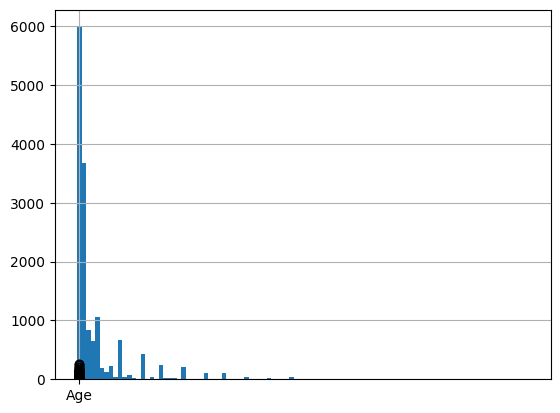

In [17]:
#graficar la distribucion de la variable a Age y un diagrama de caja y bigotes
#Quiero que el grafico sea animado
#https://towardsdatascience.com/creating-animated-gif-using-python-opencv-31f5bbf27d9c
#https://stackoverflow.com/questions/44947505/how-to-make-a-gif-loop-in-python
#https://stackoverflow.com/questions/753190/programmatically-generate-video-or-animated-gif-in-python   

train_data['Age'].hist(bins=100)
train_data.boxplot(column=['Age'])

In [14]:
# generar una tabla resumen de train_data con cantidad de registros, cantidad de requistros que poseen imagen (imagen?) y cantidad de registros que poseen sentimientos (sentiment?)

cantidadRegistros = train_data.shape[0]
print(f'Cantidad de registros: {cantidadRegistros}')
print(f'Cantidad de registros con imagen: {train_data["Imagen?"].sum()}')
print(f'Cantidad de registros sin imagen: {cantidadRegistros - train_data["Imagen?"].sum()}')
print(f'Cantidad de registros con sentimientos: {train_data["sentiment?"].sum()}')
print(f'Cantidad de registros sin sentimientos: {cantidadRegistros - train_data["sentiment?"].sum()}')

Cantidad de registros: 14993
Cantidad de registros con imagen: 14652
Cantidad de registros sin imagen: 341
Cantidad de registros con sentimientos: 14442
Cantidad de registros sin sentimientos: 551


In [19]:
#import dtale
#dtale.show(train_data)
#http://localhost:40000/


In [19]:
#import seaborn.apionly as sns #ya no va mas este llamado. Reemplazo por linea siguiente
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
#sns.set() #ya no va mas. Reemplazo por linea siguiente
sns.set_theme() 

In [20]:
#setup para el notebook
%matplotlib inline
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (16, 12)

In [21]:
train_data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Description,PhotoAmt,AdoptionSpeed,Imagen?,sentiment?,count,Score,Magnitude,CountEntity,CountSentences
PetID,,,,,,,,,,,,,,,,,,,,,
86e1089a3,2,Nibble,3,299,0,1,1,7,0,1,...,Nibble is a 3+ month old ball of cuteness. He ...,1.00,2,True,True,1.00,0.30,2.40,13.00,6.00
6296e909a,2,No Name Yet,1,265,0,1,1,2,0,2,...,I just found it alone yesterday near my apartm...,2.00,0,True,True,2.00,-0.20,0.70,2.00,2.00
3422e4906,1,Brisco,1,307,0,1,2,7,0,2,...,Their pregnant mother was dumped by her irresp...,7.00,3,True,True,7.00,0.20,3.70,13.00,7.00
5842f1ff5,1,Miko,4,307,0,2,1,2,0,2,...,"Good guard dog, very alert, active, obedience ...",8.00,2,True,True,8.00,0.90,0.90,6.00,1.00
850a43f90,1,Hunter,1,307,0,1,1,0,0,2,...,This handsome yet cute boy is up for adoption....,3.00,2,True,True,3.00,0.60,3.70,13.00,6.00


In [22]:
#Detectar columnas categoricas
#Convertir columnas tipo object a categoricas o dato que corresponda
train_data2 = train_data.drop("Description", axis=1)
train_data2 = train_data2.drop("RescuerID", axis=1)
train_data2 = train_data2.drop("Name", axis=1)

#train_data2['AdoptionSpeed'] = pd.Categorical(train_data2['AdoptionSpeed'])
train_data2['Type'] = pd.Categorical(train_data2['Type'])
train_data2['Breed1'] = pd.Categorical(train_data2['Breed1'])
train_data2['Breed2'] = pd.Categorical(train_data2['Breed2'])
train_data2['Gender'] = pd.Categorical(train_data2['Gender'])
train_data2['Color1'] = pd.Categorical(train_data2['Color1'])
train_data2['Color2'] = pd.Categorical(train_data2['Color2'])
train_data2['Color3'] = pd.Categorical(train_data2['Color3'])
train_data2['MaturitySize'] = pd.Categorical(train_data2['MaturitySize'])
train_data2['FurLength'] = pd.Categorical(train_data2['FurLength'])
train_data2['Vaccinated'] = pd.Categorical(train_data2['Vaccinated'])
train_data2['Dewormed'] = pd.Categorical(train_data2['Dewormed'])
train_data2['Sterilized'] = pd.Categorical(train_data2['Sterilized'])
train_data2['Health'] = pd.Categorical(train_data2['Health'])

train_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14993 entries, 86e1089a3 to a83d95ead
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Type            14993 non-null  category
 1   Age             14993 non-null  int64   
 2   Breed1          14993 non-null  category
 3   Breed2          14993 non-null  category
 4   Gender          14993 non-null  category
 5   Color1          14993 non-null  category
 6   Color2          14993 non-null  category
 7   Color3          14993 non-null  category
 8   MaturitySize    14993 non-null  category
 9   FurLength       14993 non-null  category
 10  Vaccinated      14993 non-null  category
 11  Dewormed        14993 non-null  category
 12  Sterilized      14993 non-null  category
 13  Health          14993 non-null  category
 14  Quantity        14993 non-null  int64   
 15  Fee             14993 non-null  int64   
 16  State           14993 non-null  int64   
 17  Video

In [23]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(train_data2.drop("AdoptionSpeed", axis=1), 
                                                                    train_data2.AdoptionSpeed, test_size=0.1, random_state=0)
print(f"X_train: {X_train.shape}")
print(f"X_valid: {X_valid.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_valid: {y_valid.shape}")

X_train: (13493, 26)
X_valid: (1500, 26)
y_train: (13493,)
y_valid: (1500,)


In [25]:
from xgboost import XGBClassifier
#import xgboost as xgb
from sklearn.model_selection import GridSearchCV



In [26]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4, 6, 8], # Maximum number of levels in tree
    'min_child_weight': [1, 5, 10], # Minimum number of samples required at each leaf node
    'gamma': [0, 0.1, 0.2], # Minimum loss reduction required to ma ke a further partition on a leaf node. The larger gamma is, the more conservative the algorithm will be.
    'n_estimators': [100, 200, 300] # Number of boosting stages to perform
}
categorical_columns = ['Type', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health']

# Create a based model
xgb_clf = XGBClassifier(#objective='multi:softmax', 
                            #num_class=len(np.unique(y_train)), 
                            #early_stopping_rounds=10, 
                            enable_categorical=True, categorical_feature=categorical_columns,
                            eval_metric=['merror','mlogloss'], 
                            seed=42)

# Instantiate the grid search model
grid = GridSearchCV(estimator = xgb_clf, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 2)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\Maira\Desktop\MAESTRIA\LABO_II\Kaggle\Labo_II\Lib\site-packages\xgboost\data.py:463: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  or is_sparse(dtype)
c:\Users\Maira\Desktop\MAESTRIA\LABO_II\Kaggle\Labo_II\Lib\site-packages\xgboost\data.py:464: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or (is_categorical_dtype(dtype) and enable_categorical)
c:\Users\Maira\Desktop\MAESTRIA\LABO_II\Kaggle\Labo_II\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Maira\Desktop\MAESTRIA\LABO_II\Kaggle\Labo_II\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categor

{'gamma': 0.1, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 100}